In [1]:
IBM= read.csv("IBM-2.csv", stringsAsFactors=FALSE)
MSFT= read.csv("MSFT.csv", stringsAsFactors=FALSE)
GOOG= read.csv("GOOG.csv", stringsAsFactors=FALSE)
AAPL= read.csv("AAPL.csv", stringsAsFactors=FALSE)
AMZN= read.csv("AMZN.csv", stringsAsFactors=FALSE)
FB= read.csv("FB.csv", stringsAsFactors=FALSE)
NFLX= read.csv("NFLX.csv", stringsAsFactors=FALSE)
TSLA= read.csv("TSLA.csv", stringsAsFactors=FALSE)
ORCL= read.csv("ORCL.csv", stringsAsFactors=FALSE)
SAP= read.csv("SAP.csv", stringsAsFactors=FALSE)

head(IBM)

str(IBM$Date)

Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,154.50,154.81,153.54,154.25,139.3655,4202500
2018-01-03,157.34,159.81,156.33,158.49,143.1963,9441600
2018-01-04,159.65,162.32,159.37,161.70,146.0966,7556200
2018-01-05,162.44,162.90,161.10,162.49,146.8103,5195800
2018-01-08,162.66,163.91,161.70,163.47,147.6958,5237500
2018-01-09,163.90,164.53,163.06,163.83,148.0210,4341800


 chr [1:251] "2018-01-02" "2018-01-03" "2018-01-04" "2018-01-05" ...


In [18]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
IBMCols= IBM[,c("Close", "Adj.Close")] 
MSFTCols= MSFT[, c("Close", "Adj.Close")]
GOOGCols= GOOG[, c("Close", "Adj.Close")]
AAPLCols= AAPL[, c("Close", "Adj.Close")]
AMZNCols= AMZN[, c("Close", "Adj.Close")]
FBCols= FB[, c("Close", "Adj.Close")]
NFLXCols= NFLX[, c("Close", "Adj.Close")]
TSLACols= TSLA[, c("Close", "Adj.Close")]
ORCLCols= ORCL[, c("Close", "Adj.Close")]
SAPCols= SAP[, c("Close", "Adj.Close")]






df= data.frame(Date= IBM$Date, IBM= IBMCols, MSFT= MSFTCols, GOOG= GOOGCols, AAPL= AAPLCols, AMZN= AMZNCols, FB= FBCols, NFLX= NFLXCols, TSLA= TSLACols, ORCL= ORCLCols, SAP= SAPCols )
df$index= 1:length(df$Date)
head(df)


Date,IBM.Close,IBM.Adj.Close,MSFT.Close,MSFT.Adj.Close,GOOG.Close,GOOG.Adj.Close,AAPL.Close,AAPL.Adj.Close,AMZN.Close,...,FB.Adj.Close,NFLX.Close,NFLX.Adj.Close,TSLA.Close,TSLA.Adj.Close,ORCL.Close,ORCL.Adj.Close,SAP.Close,SAP.Adj.Close,index
2018-01-02,154.25,139.3655,85.95,83.25638,1065.00,1065.00,172.26,166.8040,1189.01,...,181.42,201.07,201.07,320.53,320.53,46.63,44.92264,112.39,109.2076,1
2018-01-03,158.49,143.1963,86.35,83.64384,1082.48,1082.48,172.23,166.7750,1204.20,...,184.67,205.05,205.05,317.25,317.25,47.71,45.96309,113.31,110.1015,2
2018-01-04,161.70,146.0966,87.11,84.38003,1086.40,1086.40,173.03,167.5496,1209.59,...,184.33,205.63,205.63,314.62,314.62,48.18,46.41589,115.05,111.7923,3
2018-01-05,162.49,146.8103,88.19,85.42618,1102.23,1102.23,175.00,169.4572,1229.14,...,186.85,209.99,209.99,316.58,316.58,48.47,46.69527,116.33,113.0360,4
2018-01-08,163.47,147.6958,88.28,85.51336,1106.94,1106.94,174.35,168.8278,1246.87,...,188.28,212.05,212.05,336.41,336.41,48.98,47.18660,114.80,111.5493,5
2018-01-09,163.83,148.0210,88.22,85.45524,1106.26,1106.26,174.33,168.8085,1252.70,...,187.87,209.31,209.31,333.69,333.69,49.06,47.44772,114.16,110.9275,6


In [13]:
#functions required to calculate MTM

get_cash= function(amountOfMoney, date_index, current_stocks){ 
    cash_vec= c()
    
    for (i in current_stocks){
        #finding the name of closePrice column needed
        colName= paste(i , ".Close", sep= "") 
        closePrice= filter(df, index== date_index)[[colName]]
        
        cash= amountOfMoney %% closePrice
        cash_vec= c(cash_vec, cash)
    } 
    
    sum(cash_vec)
}


get_shares= function(amountOfMoney, date_index, current_stocks){ 
    shares_vec= c()
    
    for (i in current_stocks){
        #finding the name of closePrice column needed
        colName= paste(i , ".Close", sep= "") 
        closePrice= filter(df, index== date_index)[[colName]]
        
        indv_shares= as.integer(amountOfMoney / closePrice)
        shares_vec= c(shares_vec, indv_shares)
    } 
    shares_vec
}


get_close= function(date_index, current_stocks){
    closePrice_vec= c()
    for (i in current_stocks){
        #finding the name of closePrice column needed
        colName= paste(i , ".Close", sep= "") 
        closePrice= filter(df, index== date_index)[[colName]]
        
        closePrice_vec= c(closePrice_vec, closePrice)
    }
    
    closePrice_vec
}


get_daily_MTM= function(cash, closePrices, shares){
    daily_MTM= cash+ sum(closePrices * shares)
}



#to calculate new MTM just change current_stock, date, MTM and currenDate values
universe = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP')
current_stocks= c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
MTM= 5000000
amountOfMoney= MTM / length(current_stocks)




#a function that tests difference between ratios of div1/div2 and close1/close2
dividend= function(Adj1, Adj2, close1, close2){
    diff= (Adj1/Adj2) - (close1/close2)
    if(diff != 0){
        dividend= diff * close2
    }else{
        dividend= 0
    }
}

#date_index= 2

get_daily_dividend= function(df, date_index, current_stocks){
    dividend_vec= c()
    for (i in current_stocks){
        #finding the name of closePrice column needed
        AdjCol= paste(i , ".Adj.Close", sep= "")
        closeCol= paste(i , ".Close", sep= "")
        
        #getting values of Adj.close and .close at the previous day
        Adj1= filter(df, index== date_index-1)[[AdjCol]]
        close1= filter(df, index== date_index-1)[[closeCol]]
        
        #getting values of Adj.close and .close at the current day
        Adj2= filter(df, index== date_index)[[AdjCol]]
        close2= filter(df, index== date_index)[[closeCol]]
        
        #getting divident for stock i
        div= dividend(Adj1, Adj2, close1, close2)
        dividend_vec= c(dividend_vec, abs(div))
    }
    
    dividend_vec
}

new_stocks= function(universe, openingDate_index, closedDate_index, strategy){
    percentage_change=c()
    stock_name=c()
    for (i in universe){
        colName= paste(i , ".Adj.Close", sep= "") 
        oldclosePrice= filter(df, index== openingDate_index)[[colName]]
        newclosePrice= filter(df, index== closedDate_index)[[colName]]
        stock_name= c(stock_name, i)  
        change= ((newclosePrice-oldclosePrice)/oldclosePrice)*100
        percentage_change=c(percentage_change, change) 
    }
    
    new_df= cbind(stock= stock_name,change= percentage_change)
    
    if(strategy == "low"){
        new_df=new_df[order(new_df[,'change'],decreasing=F),]
    }else{
        new_df=new_df[order(new_df[,'change'],decreasing=T),]
    }
    
    stocks=c(new_df[1:5,1])
    
    stocks
}

    

In [34]:
 #a function to perform selling and buying and calculating MTM
calculate= function(strategy, df, MTM, current_stocks, universe, interval){
    results_df= data.frame(index= df$index, Date= df$Date)
    #print(results_df)
    MTM_vec= c()
    cash_div= c()
    for(k in 1:length(df$index)){  
        #calculating current dividend to add it later to the cash amount
        if(k == 1){
            current_dividend= c()
        }else{
            current_dividend= get_daily_dividend(df, 2, current_stocks) 
        }
        
        #the first five days uses the initial stocks
        if(k < interval+1){
            amountOFMoney= MTM / 5
            new_cash= get_cash(amountOfMoney, 1, current_stocks)
            new_shares= get_shares(amountOfMoney, 1, current_stocks)
            closePrices= get_close(k, current_stocks)
            
            #should I use this cash to calculate dividend?
            cash_after_dividend= new_cash + sum(new_shares * current_dividend)
            cash_div= c(cash_div, cash_after_dividend)
            
            MTM= get_daily_MTM(cash_after_dividend, closePrices, new_shares)
            MTM_vec= c(MTM_vec, MTM)
    
        }else{
            i= -1
            #if it is the fifth day, sell and buy and recalculate
            if(i+k %% interval == 0){
                #selling
                closePrices= get_close(k, current_stocks)
                cash_after_dividend= new_cash + sum(new_shares * current_dividend)
                
                cash_div= c(cash_div, cash_after_dividend)
                
                selling_MTM= get_daily_MTM (cash_after_dividend, closePrices, new_shares)
                amountOfMoney= selling_MTM / 5   #this is the amount of money we have after selling
                
                #buying: getting the new stocks and getting new MTM based on them
               if(strategy == "l"){
                    current_stocks= new_stocks(universe, k-interval, k, "low")
                }else if(strategy == "h"){
                   current_stocks= new_stocks(universe, k-interval, k, "high")
                }
                

                closePrices= get_close(k, current_stocks)
                new_cash= get_cash(amountOfMoney, k, current_stocks)
                new_shares= get_shares(amountOfMoney, k, current_stocks)
            
                MTM= get_daily_MTM (cash_after_dividend, closePrices, new_shares)
                MTM_vec= c(MTM_vec, MTM)
                
            }else{  
                closePrices= get_close(k, current_stocks)
                cash_after_dividend= new_cash + sum(new_shares * current_dividend)
                cash_div= c(cash_div, cash_after_dividend)
                
                MTM= get_daily_MTM (cash_after_dividend, closePrices, new_shares)
                MTM_vec= c(MTM_vec, MTM)
            }     
        }
    } 
    results_df$MTM=  MTM_vec
    results_df$cash.div= cash_div
    results_df
    
}



In [35]:
#dataframe with low MTM   
results_low= calculate("l", df, amountOfMoney, current_stocks, universe,interval=5)

In [62]:
head(results_low)

index,Date,MTM,cash.div
1,2018-01-02,5000000,1312.546
2,2018-01-03,5061134,1312.671
3,2018-01-04,5103637,1312.671
4,2018-01-05,5164049,1312.671
5,2018-01-08,5187004,1312.671
6,2018-01-09,5193053,1312.671


In [20]:
#dataframe with high MTM
results_high= calculate("h", df, amountOfMoney, current_stocks, universe,5)

In [23]:
head(results_high)

index,Date,MTM,cash.div
1,2018-01-02,5000000,1312.546
2,2018-01-03,5061134,1312.671
3,2018-01-04,5103637,1312.671
4,2018-01-05,5164049,1312.671
5,2018-01-08,5187004,1312.671
6,2018-01-09,5193701,1312.671


In [24]:
#Creating High tech index
avg_close= mapply(mean, df$IBM.Close, df$MSFT.Close, df$GOOG.Close, df$AAPL.Close, df$FB.Close, df$NFLX.Close, df$TSLA.Close, df$SAP.Close, df$AMZN.Close, df$ORCL.Close)


finalResults= data.frame(index= results_low$index, Date= results_low$Date)

finalResults$MTM_low= results_low$MTM
finalResults$cash.dive.low= results_low$cash.div
finalResults$MTM.high= results_high$MTM
finalResults$cash.dive.high= results_high$cash.div
finalResults$High.Tech.Index= avg_close

head(finalResults)


index,Date,MTM_low,cash.dive.low,MTM.high,cash.dive.high,High.Tech.Index
1,2018-01-02,5000000,1312.546,5000000,1312.546,154.25
2,2018-01-03,5061134,1312.671,5061134,1312.671,158.49
3,2018-01-04,5103637,1312.671,5103637,1312.671,161.70
4,2018-01-05,5164049,1312.671,5164049,1312.671,162.49
5,2018-01-08,5187004,1312.671,5187004,1312.671,163.47
6,2018-01-09,5193053,1312.671,5193701,1312.671,163.83


In [25]:
#Calulating MTM and high tech index daily percentage change

MTM_percentage= ((finalResults$MTM_low - finalResults$MTM_low[1]) / finalResults$MTM_low[1]) * 100
finalResults$MTM.percentage.change= MTM_percentage

HT_percentage= ((finalResults$High.Tech.Index - finalResults$High.Tech.Index[1]) / finalResults$High.Tech.Index[1]) * 100
finalResults$HT.percentage.change= HT_percentage

#creating a dataframe to hold the data to be melted to process graphing
temp_df= data.frame(Date= finalResults$Date, HT_percentage= finalResults$HT.percentage.change, MTM_percentage= finalResults$MTM.percentage.change)
head(temp_df)

Date,HT_percentage,MTM_percentage
2018-01-02,0.000000,0.000000
2018-01-03,2.748788,1.222685
2018-01-04,4.829820,2.072747
2018-01-05,5.341981,3.280977
2018-01-08,5.977310,3.740077
2018-01-09,6.210698,3.861062


In [42]:
install.packages('reshape2')
install.packages("vctrs")
install.packages("sqldf")
library('tidyverse')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ stringr 1.4.0
✔ tidyr   1.0.2     ✔ forcats 0.4.0
✔ readr   1.3.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


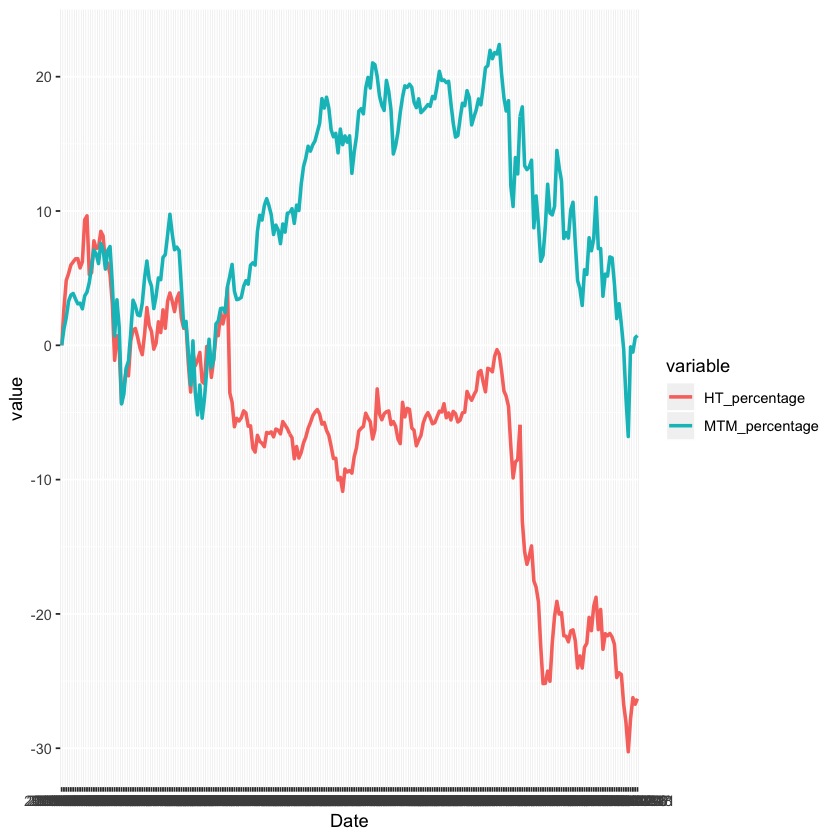

In [191]:
#ploting time series graph for MTM percenatge change high tech index percentage change

temp_df= reshape2::melt(temp_df, id.vars= "Date")

ggplot(temp_df, aes(x= Date, y= value, group= variable, color= variable)) + geom_line(size= 1)

In [45]:
#Reading dollar to japnese yen data frame
dollar_yen_df= read.csv("dollar-yen-exchange-rate-historical-chart.csv", stringsAsFactors=FALSE)
head(dollar_yen_df)

date,value
1/4/71,357.73
1/5/71,357.81
1/6/71,357.86
1/7/71,357.87
1/8/71,357.82
1/11/71,357.95


In [47]:
names(dollar_yen_df)[1] <- "Date"
names(dollar_yen_df)[2] <- "Value"

In [48]:
head(dollar_yen_df)

Date,Value
1/4/71,357.73
1/5/71,357.81
1/6/71,357.86
1/7/71,357.87
1/8/71,357.82
1/11/71,357.95


In [56]:
dollar_yen_df$Date= as.Date(dollar_yen_df$Date,format="%m/%d/%y")
str(dollar_yen_df$Date)
IBM$Date= as.Date(IBM$Date)
str(IBM$Date)

 Date[1:12491], format: "1971-01-04" "1971-01-05" "1971-01-06" "1971-01-07" "1971-01-08" ...
 Date[1:251], format: "2018-01-02" "2018-01-03" "2018-01-04" "2018-01-05" "2018-01-08" ...


In [52]:
library(sqldf)

Loading required package: gsubfn
Loading required package: proto
Warning message in system2("/usr/bin/otool", c("-L", shQuote(DSO)), stdout = TRUE):
“running command ''/usr/bin/otool' -L '/opt/anaconda3/envs/R/lib/R/library/tcltk/libs//tcltk.so'' had status 1”Loading required package: RSQLite


In [57]:
#Using sql query to load data from dollar_yen_df only for dates in 2018

usd_jpy=sqldf('SELECT * FROM dollar_yen_df WHERE Date in (SELECT Date FROM IBM)')

In [59]:
head(usd_jpy)
str(usd_jpy)

Date,Value
2018-01-02,112.29
2018-01-03,112.51
2018-01-04,112.75
2018-01-05,113.05
2018-01-08,113.09
2018-01-09,112.65


'data.frame':	251 obs. of  2 variables:
 $ Date : Date, format: "2018-01-02" "2018-01-03" ...
 $ Value: num  112 113 113 113 113 ...


In [60]:
#Calulating dollar to yen exchange in MTM Value and daily percenatge change 


multiply= function(x, y){ x * y}

usd_jpy$MTM= finalResults$MTM_low

usd_jpy$MTM_jpy= mapply(multiply, usd_jpy$MTM, usd_jpy$Value)


usd_jpy$jpy_perc_change= ((usd_jpy$MTM_jpy - usd_jpy$MTM_jpy[1]) / usd_jpy$MTM_jpy[1]) * 100
head(usd_jpy)

Date,Value,MTM,MTM_jpy,jpy_perc_change
2018-01-02,112.29,5000000,561450000,0.000000
2018-01-03,112.51,5061134,569428216,1.421002
2018-01-04,112.75,5103637,575435109,2.490891
2018-01-05,113.05,5164049,583795721,3.980002
2018-01-08,113.09,5187004,586598264,4.479164
2018-01-09,112.65,5193053,584997434,4.194039


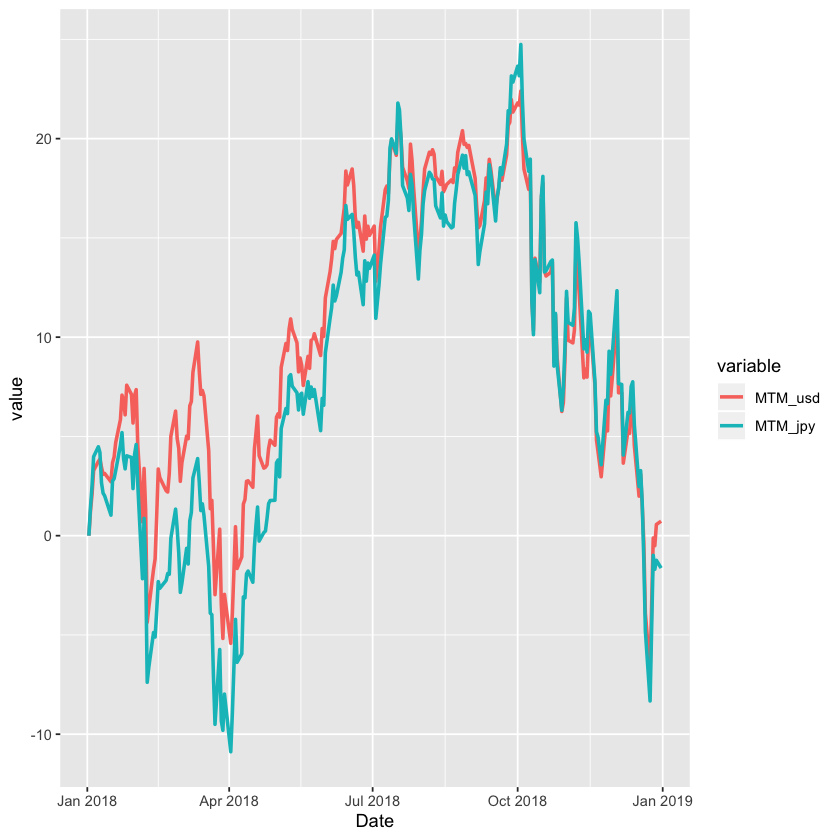

In [263]:
#plotting the graph for daily percentage change in MTM value in dollars and MTM value in yen.

temp2_df= data.frame(Date= usd_jpy$Date, MTM_usd= finalResults$MTM.percentage.change, MTM_jpy= usd_jpy$jpy_perc_change)

temp2_df= reshape2::melt(temp2_df, id.vars= "Date")

ggplot(temp2_df, aes(x= Date, y= value, group= variable, color= variable)) + geom_line(size= 1)


In [39]:
#Calculating the optimal no. of days for MTM Value


high_MTM=c()
interval_day=c()
for (i in 1:31){
    temp_df_3= calculate("l", df, amountOfMoney, current_stocks, universe,i)
    high_MTM=c(high_MTM,temp_df_3$MTM[251])
    interval_day=c(interval_day,i)   
}
temp_df_4=cbind(interval_of_days=interval_day,MTM_value=high_MTM)

In [40]:
Optimal_days=temp_df_4[order(temp_df_4[,'MTM_value'],decreasing=T),]

In [41]:
Optimal_days

interval_of_days,MTM_value
24,5893229
13,5803016
4,5586583
22,5585632
9,5432885
8,5374874
31,5315436
6,5253237
14,5209472
16,5184581


#So the optimal no of days for maximum MTM i 24 Days.